In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = "digital_wallet_transactions.csv"

In [190]:
df = pd.read_csv(data_dir, parse_dates=['transaction_date'])
df.head(3)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban


In [204]:
weekly_transactions = df.groupby(df['transaction_date'].dt.to_period('W')).size().reset_index(name='transaction_count')
monthly_transactions = df.groupby(df['transaction_date'].dt.to_period('M')).size().reset_index(name='transaction_count')

##  Understanding User Metrics and Behaviour

Text(0.5, 1.0, 'Weekly Transactions Activity')

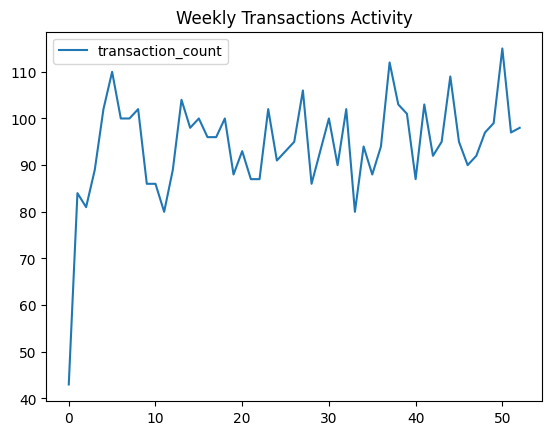

In [220]:
sns.lineplot( data=weekly_transactions)  # weekly transactions activity over time
plt.title('Weekly Transactions Activity')

Text(0.5, 1.0, 'Monthly Active Users Transactions')

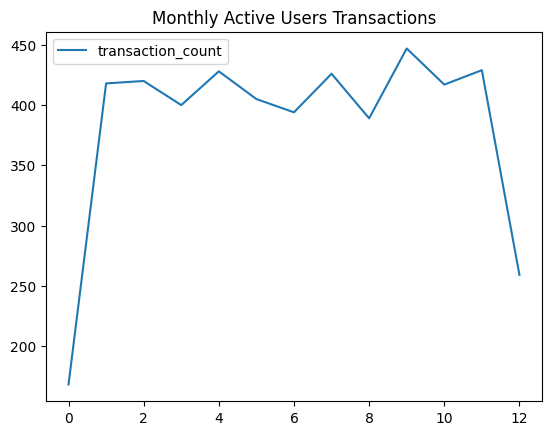

In [222]:
sns.lineplot( data=monthly_transactions)  # weekly transactions activity over time
plt.title('Monthly Active Users Transactions')

#### Observations : Weekly Active users are varying between 80-110 but no exponential improvement overtime. Reduction of Monthly active users from 11-12 month.

### Identifying Merchant influence on unsuccessful transactions

In [537]:
unsuccessful_transactions = df[df['transaction_status'] != 'Successful']
unsuccessful_transactions.head(3)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
82,83,e204f872-24c1-4cd3-a98e-313027c7dd03,USER_05459,2023-08-23 20:10:00,Loan Repayment,Home Loan EMI,SBI,4527.36,44.44,43.92,771,Debit Card,Failed,MERCH_0086,Android,Urban
113,114,0417b394-5ecb-4b8f-b47d-4a5083857e09,USER_09924,2023-08-26 02:13:00,Grocery Shopping,Basmati Rice,Grofers,1142.21,35.62,42.15,124,Wallet Balance,Failed,MERCH_0943,Android,Urban
143,144,318775f8-28d0-40e3-81b8-c64ff13025c6,USER_06230,2023-08-29 14:29:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,7160.72,19.52,43.27,198,UPI,Failed,MERCH_0061,iOS,Urban


In [538]:
unsuccessful_transactions.describe().drop(columns=['idx','transaction_date'])

,product_amount,transaction_fee,cashback,loyalty_points
count,245.000000,245.000000,245.000000,245.000000
mean,5014.264041,24.586449,48.335061,500.416327
min,13.330000,0.110000,0.300000,1.000000
25%,2477.220000,11.400000,22.950000,242.000000
50%,4884.920000,24.190000,50.040000,518.000000
75%,7683.130000,37.110000,72.440000,750.000000
max,9993.540000,49.900000,99.370000,996.000000
std,2970.199984,14.718212,28.408851,282.711415


In [539]:
successful_transactions.describe().drop(columns=['idx','transaction_date'])

,product_amount,transaction_fee,cashback,loyalty_points
count,4755.000000,4755.000000,4755.000000,4755.000000
mean,4954.578111,25.219914,50.778511,498.706625
min,10.090000,0.010000,0.000000,0.000000
25%,2450.965000,12.715000,26.680000,246.000000
50%,4944.250000,25.090000,51.550000,503.000000
75%,7433.885000,37.990000,75.170000,749.000000
max,9996.950000,49.990000,100.000000,999.000000
std,2880.868656,14.526700,28.526157,289.309734


In [540]:
weekly_unsuccessful_transactions = unsuccessful_transactions.groupby(df['transaction_date'].dt.to_period('W')).size().reset_index(name='transaction_count')
monthly_unsuccessful_transactions = unsuccessful_transactions.groupby(df['transaction_date'].dt.to_period('M')).size().reset_index(name='transaction_count')

Text(0.5, 1.0, 'weekly Unsuccessful Transactions')

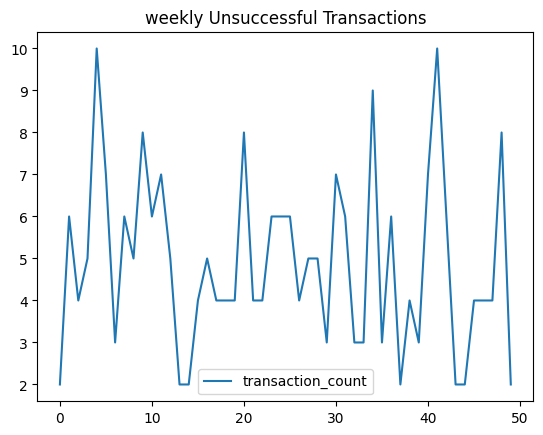

In [545]:
sns.lineplot(data=weekly_unsuccessful_transactions)
plt.title('weekly Unsuccessful Transactions')

Text(0.5, 1.0, 'Monthly Unsuccessful Transactions')

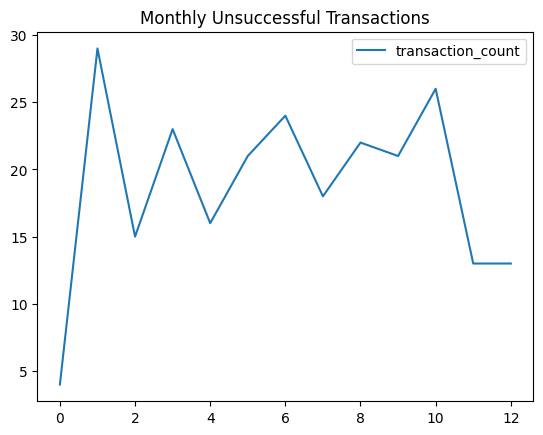

In [546]:
sns.lineplot(data=monthly_unsuccessful_transactions)
plt.title('Monthly Unsuccessful Transactions')

<Axes: xlabel='count', ylabel='merchant_name'>

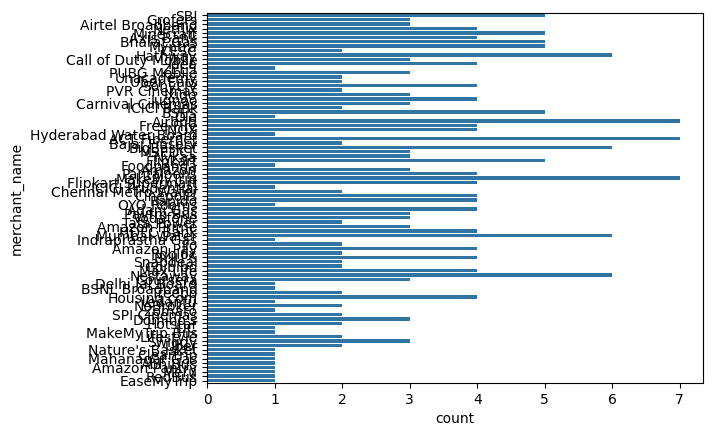

In [543]:
sns.countplot(y="merchant_name", data=unsuccessful_transactions)  # Repeat user product category distribution

In [ ]:
merchantwise_unsuccessful_data = pd.DataFrame(unsuccessful_transactions.merchant_name.value_counts().sort_values(ascending=False)) # Sorting by merchant_id for better visualization

In [ ]:
# considering cases above 75th percentile for better visualization
merchantwise_unsuccessful_data = merchantwise_unsuccessful_data[merchantwise_unsuccessful_data['count']> 4].T

In [ ]:
high_unsuccessful_merchant_products = merchantwise_unsuccessful_data.keys()

In [ ]:
merchant_wise_unsuccessful_transactions = unsuccessful_transactions[unsuccessful_transactions['merchant_name'].isin(high_unsuccessful_merchant_products)]  # Example to filter unsuccessful transactions for a specific merchant

<Axes: xlabel='count', ylabel='product_category'>

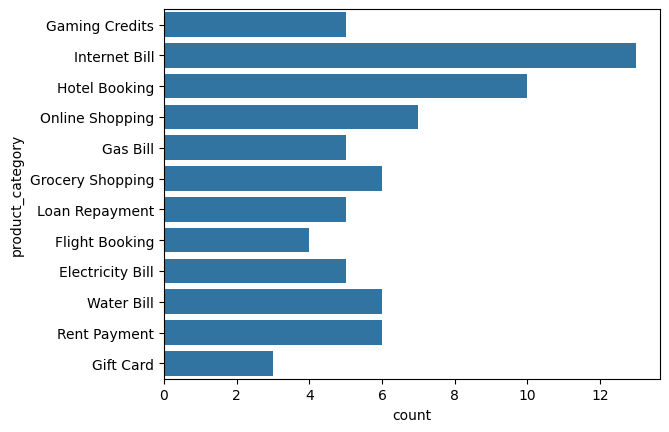

In [ ]:
sns.countplot(y="product_category", data=merchant_wise_unsuccessful_transactions)  # Repeat user product category distribution

In [536]:
merchant_wise_unsuccessful_transactions[merchant_wise_unsuccessful_transactions["product_category"] == "Internet Bill"].head(3)  # Example to filter unsuccessful transactions for a specific product category

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
1989,1990,d9a00948-2bcd-4a1d-80ed-e22984b148e6,USER_07729,2024-01-13 10:18:00,Internet Bill,Fiber 100Mbps Plan,Hathway,6664.30,34.09,25.10,407,Credit Card,Pending,MERCH_0005,Android,Urban
2588,2589,99a995ae-050e-441e-a318-7528e5ff8331,USER_01150,2024-02-26 00:01:00,Internet Bill,Broadband 50Mbps Plan,Hathway,75.86,49.11,75.53,577,Wallet Balance,Pending,MERCH_0163,Web,Urban
597,598,3b86174a-2b9f-4641-9e4d-22e72c7fae54,USER_02303,2023-10-01 14:16:00,Internet Bill,Business Internet Plan,ACT Fibernet,1605.49,21.67,64.52,745,Wallet Balance,Pending,MERCH_0315,Android,Urban


<Axes: xlabel='count', ylabel='merchant_name'>

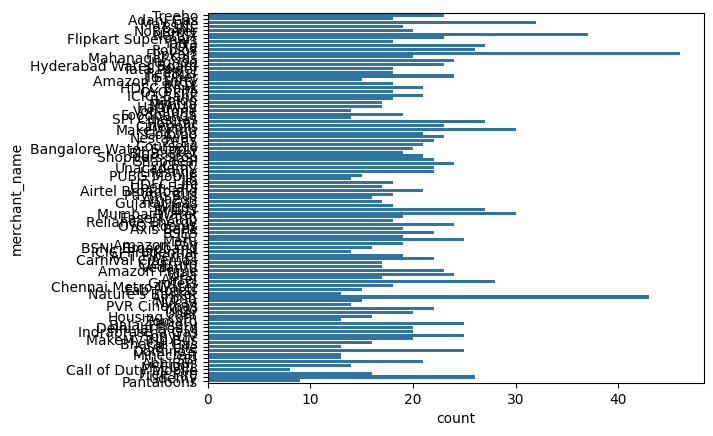

In [463]:
sns.countplot(y="merchant_name", data=repeat_user_data)  # Repeat user product category distribution

### Observation: Internet Bill contains high failure rate.

## Identifying user frequency

In [14]:
user_frequency = df.groupby("user_id").size().reset_index(name='transaction_count')

In [120]:
user_frequency.groupby("transaction_count").size().reset_index(name='user_count').sort_values(by='transaction_count')

,transaction_count,user_count
0,1,3029
1,2,759
2,3,123
3,4,21


#### Observation : 3029 users out of 3932 unique users are one time customers which indicates high churn risk,(i.e 77.03%)

## Understanding Repeat User behaviour

In [68]:
target_min_repetition = 2
repeat_users = user_frequency[user_frequency['transaction_count']  >= target_min_repetition]["user_id"].values

In [193]:
repeat_user_data = df[df['user_id'].isin(repeat_users)]
repeat_user_data.head(3)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
6,7,89df83e5-98d3-4c0f-b273-59b0d057fc34,USER_05280,2023-08-19 07:15:00,Hotel Booking,Villa,Treebo,6688.17,49.62,22.18,58,UPI,Successful,MERCH_0441,Android,Urban
7,8,1a8ab910-657a-4e57-90ec-90420290e8a1,USER_03459,2023-08-19 07:57:00,Gas Bill,Piped Natural Gas,Adani Gas,1802.28,0.11,14.56,950,UPI,Successful,MERCH_0938,iOS,Urban
9,10,19c7d2d5-8566-42ba-95aa-8d803cfeeffd,USER_07264,2023-08-19 10:01:00,Insurance Premium,Term Life Policy,Max Life,2207.90,45.70,21.87,129,Wallet Balance,Successful,MERCH_0245,iOS,Urban


<Axes: xlabel='location', ylabel='count'>

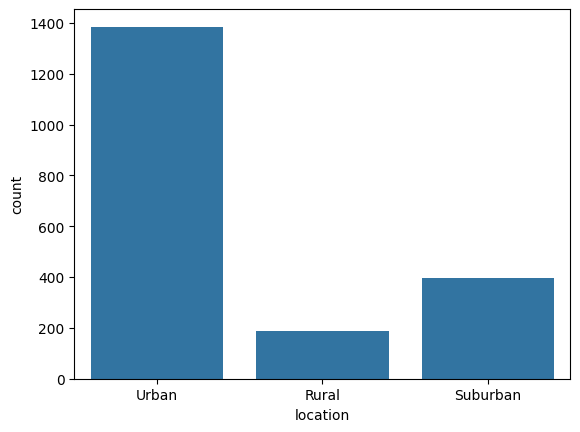

In [547]:
sns.countplot(x="location", data=repeat_user_data)  # Repeat user product category distribution

In [139]:
# Group by location for both dataframes
repeat_counts = repeat_user_data.groupby('location')['user_id'].nunique().reset_index(name='repeat_count')
total_users = df.groupby('location')['user_id'].nunique().reset_index(name='total_count')

# Merge on location
merged = pd.merge(repeat_counts, total_counts, on='location', how='left')

# Calculate percentage
merged['repeat_percentage'] = (merged['repeat_count'] / merged['total_count']) * 100
merged[['location', 'repeat_percentage']].sort_values(by='repeat_percentage', ascending=False)

,location,repeat_percentage
0,Rural,35.140562
1,Suburban,33.824975
2,Urban,23.758967



### Observation : Urban churn rate is compartively low despite high user volume

In [217]:
repeat_user_data.product_amount.values.mean()  # Average transaction amount for repeat users

np.float64(4939.135535261288)

Repeat customers are high in rural areas compared to urban areas, play with number of target_min_repetition rate to understand more about each frequency

In [ ]:
unsuccessful_transactions_of_repeat_users.groupby('payment_method')['transaction_status'].value_counts().unstack().fillna(0)

# Understanding onetime user behaviour

In [74]:
single_transaction_users = user_frequency[user_frequency['transaction_count'] == 1]["user_id"].values

In [75]:
single_user_data = df[df['user_id'].isin(single_transaction_users)]

<Axes: xlabel='count', ylabel='location'>

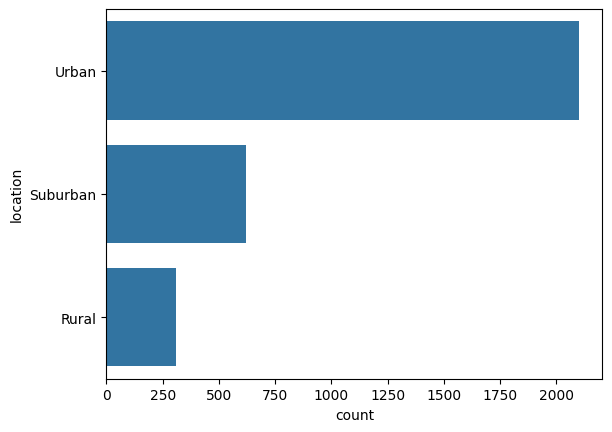

In [76]:
sns.countplot(y="location", data=single_user_data, order=single_user_data['location'].value_counts().index)  # Single transaction users by location

In [238]:
single_user_data.groupby('payment_method')['user_id'].nunique().reset_index(name='payment_count').sort_values(by='payment_count', ascending=False)

,payment_method,payment_count
2,Debit Card,641
0,Bank Transfer,618
1,Credit Card,608
3,UPI,608
4,Wallet Balance,554


In [239]:
unsuccessful_transactions_of_single_users = single_user_data[single_user_data['transaction_status'] != "Successful"]
unsuccessful_transactions_of_single_users.head(3)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
82,83,e204f872-24c1-4cd3-a98e-313027c7dd03,USER_05459,2023-08-23 20:10:00,Loan Repayment,Home Loan EMI,SBI,4527.36,44.44,43.92,771,Debit Card,Failed,MERCH_0086,Android,Urban
113,114,0417b394-5ecb-4b8f-b47d-4a5083857e09,USER_09924,2023-08-26 02:13:00,Grocery Shopping,Basmati Rice,Grofers,1142.21,35.62,42.15,124,Wallet Balance,Failed,MERCH_0943,Android,Urban
147,148,e99bf8ee-33fc-4a26-9337-2fb212e2bbec,USER_01234,2023-08-29 20:22:00,Streaming Service,Premium Plan,Netflix,5324.86,44.27,50.04,525,UPI,Failed,MERCH_0118,Android,Rural


In [461]:
k =unsuccessful_transactions_of_single_users.groupby('payment_method')['transaction_status'].value_counts().unstack().sort_values(by='Pending', ascending=False)
pd.DataFrame((k['Failed']+k['Pending'])/ (k['Failed'].sum() + k['Pending'].sum())*100).round(2).reset_index().rename(columns={0: 'percentage'}).sort_values(by='percentage', ascending=False)

,payment_method,percentage
0,Credit Card,25.34
2,UPI,20.55
1,Wallet Balance,19.18
3,Bank Transfer,18.49
4,Debit Card,16.44


### Observations : 
1. Most of the unsuccessful transactions for single users are coming from credit card(More in case of pending)
2. Transaction mix of each type of payment is almost similar

In [250]:
device_data_of_unsuccessful_transactions = unsuccessful_transactions_of_single_users.groupby('device_type')['transaction_status'].value_counts().unstack().fillna(0)


In [293]:
device_data_of_unsuccessful_transactions["Overall"] = device_data_of_unsuccessful_transactions["Failed"]+ device_data_of_unsuccessful_transactions["Pending"]
device_data_of_unsuccessful_transactions["relative_unsuccessful_percentage"] = (device_data_of_unsuccessful_transactions["Failed"]+ device_data_of_unsuccessful_transactions["Pending"])/ (device_data_of_unsuccessful_transactions["Overall"].values.sum()) * 100
device_data_of_unsuccessful_transactions.sort_values(by='relative_unsuccessful_percentage', ascending=False)
#device_data_of_unsuccessful_transactions.relative_unsuccessful_percentage.apply(lambda x: f"{x:.2f}%").reset_index().rename(columns={'relative_unsuccessful_percentage': 'percentage'})



transaction_status,Failed,Pending,Overall,relative_unsuccessful_percentage
device_type,,,,
Android,46,33,79,54.109589
iOS,31,18,49,33.561644
Web,12,6,18,12.328767


In [294]:
device_data_of_unsuccessful_transactions

transaction_status,Failed,Pending,Overall,relative_unsuccessful_percentage
device_type,,,,
Android,46,33,79,54.109589
Web,12,6,18,12.328767
iOS,31,18,49,33.561644


## Understanding Overall success rate of the transactions

In [229]:
success_metrics = df.groupby('transaction_status').size().reset_index(name='count')
success_metrics['percentage'] = (success_metrics['count'] / success_metrics['count'].sum()) * 100
success_metrics.sort_values(by='percentage', ascending=False, inplace=True)
success_metrics


,transaction_status,count,percentage
2,Successful,4755,95.10
0,Failed,146,2.92
1,Pending,99,1.98


### Observations:
 1. Success rate is 95% and failure rate is 5%.
 2. credit card and upi shows high unsuccessful rate

# Understanding transaction Metrics

In [231]:
total_productwise_cost = df.groupby('product_category')['product_amount'].sum().reset_index(name='total_cost')
average_order_value_productwise = df.groupby('product_category')['product_amount'].mean().reset_index(name='average_order_value')
order_count_productwise = df.groupby('product_category')['user_id'].nunique().reset_index(name='order_count')
product_category_metrics  = pd.merge(average_order_value_productwise,order_count_productwise,on = 'product_category',how='left')
product_category_metrics = pd.merge(product_category_metrics, total_productwise_cost, on='product_category', how='left')
product_category_metrics.sort_values(by='total_cost', ascending=False, inplace=True)
product_category_metrics.reset_index(drop=True, inplace=True)
product_category_metrics.head(10)

,product_category,average_order_value,order_count,total_cost
0,Streaming Service,4891.176120,295,1462461.66
1,Water Bill,5130.655128,271,1400668.85
2,Gas Bill,5446.079200,247,1361519.80
3,Education Fee,4717.908287,283,1349321.77
4,Movie Ticket,4916.911360,270,1337399.89
5,Hotel Booking,4816.072628,268,1319603.90
6,Food Delivery,5085.352162,259,1317106.21
7,Taxi Fare,5103.774375,253,1306566.24
8,Rent Payment,5013.002749,247,1258263.69
9,Internet Bill,5352.695579,228,1247178.07


### Revenue Metrics of successful transactions

In [295]:
successful_transactions = df[df['transaction_status'] == 'Successful']

In [423]:
inflow = successful_transactions.transaction_fee.sum()
outflow = successful_transactions.cashback.sum()  # Assuming loyalty points are converted to cash at a rate of 1 point = 0.01 currency unit
average_order_value = successful_transactions.product_amount.mean()
net_revenue = inflow - outflow

In [424]:
pd.DataFrame({
    'inflow': [inflow],'outflow': [outflow], 'net_revenue': [net_revenue],'average_order_value': [average_order_value]}).round(2)  

,inflow,outflow,net_revenue,average_order_value
0,119920.69,241451.82,-121531.13,4954.58


In [331]:
successful_transactions.head(3)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban


### Fraud Analysis

In [439]:
revenue_data = pd.DataFrame()
revenue_data['user_id'] = successful_transactions.user_id
revenue_data['transaction_id'] = successful_transactions.transaction_id
revenue_data['product_amount'] = successful_transactions.product_amount
revenue_data['transaction_fee'] = successful_transactions.transaction_fee
revenue_data['cashback'] = successful_transactions.cashback
revenue_data['loyality_points'] = successful_transactions.loyalty_points

In [440]:
revenue_data

,user_id,transaction_id,product_amount,transaction_fee,cashback,loyality_points
0,USER_05159,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,1525.39,36.69,19.19,186
1,USER_07204,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,1495.40,28.19,89.99,182
2,USER_00903,2a393013-733c-4add-9f09-bed1eeb33676,1267.71,11.36,95.70,994
3,USER_01769,9a07ad19-4673-4794-9cd2-9b139f39c715,9202.63,6.41,82.24,409
4,USER_03544,76418260-c985-4011-979d-0914604d0d68,3100.58,41.15,40.47,837
...,...,...,...,...,...,...
4995,USER_03918,2cad1456-e6dd-4d0f-9463-a071a462c2ae,9496.45,37.25,87.47,284
4996,USER_09281,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,710.40,14.01,55.24,538
4997,USER_05939,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,2750.06,48.69,72.10,652
4998,USER_09925,f88d6fb3-d747-4963-82f3-92e181a93771,9976.19,21.96,40.44,614


In [441]:
revenue_data['profitability_ratio'] = (revenue_data['transaction_fee']-revenue_data['cashback']-0.1*revenue_data['loyality_points'])/ revenue_data['transaction_fee']

In [442]:
revenue_data.describe()

,product_amount,transaction_fee,cashback,loyality_points,profitability_ratio
count,4755.000000,4755.000000,4755.000000,4755.000000,4755.000000
mean,4954.578111,25.219914,50.778511,498.706625,-16.039713
std,2880.868656,14.526700,28.526157,289.309734,189.944001
min,10.090000,0.010000,0.000000,0.000000,-11125.000000
25%,2450.965000,12.715000,26.680000,246.000000,-7.012131
50%,4944.250000,25.090000,51.550000,503.000000,-3.014637
75%,7433.885000,37.990000,75.170000,749.000000,-1.485827
max,9996.950000,49.990000,100.000000,999.000000,0.939472


<Axes: xlabel='profitability_ratio'>

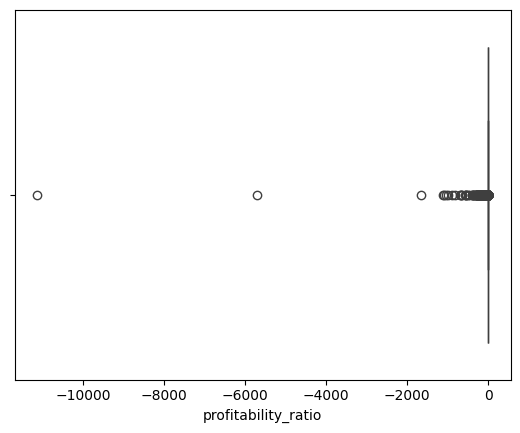

In [443]:
sns.boxplot(x = 'profitability_ratio', data=revenue_data)

In [455]:
# potential fraud outliers is assumed to be those with a profitability ratio below the 20th percentile of the profitability ratio
min_considerable_value = -1500
revenue_data[revenue_data['profitability_ratio'] < min_considerable_value]

,user_id,transaction_id,product_amount,transaction_fee,cashback,loyality_points,profitability_ratio
374,USER_04754,c7480c4e-c8b9-481d-8c3d-e4267c5c0533,5060.74,0.04,62.14,39,-1650.0
1374,USER_03193,bc679658-be33-4d5b-88da-726c264d026d,6518.42,0.02,32.97,812,-5707.5
4885,USER_07952,924cbba2-f9f2-4644-b0eb-5ce83735f0f6,1702.97,0.01,81.26,300,-11125.0


In [458]:
#

In [459]:
fraud_outliers = revenue_data[revenue_data['profitability_ratio'] < min_considerable_value].transaction_id.values

In [460]:
df[df['transaction_id'].isin(fraud_outliers)]

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
374,375,c7480c4e-c8b9-481d-8c3d-e4267c5c0533,USER_04754,2023-09-16 15:09:00,Education Fee,Data Science Bootcamp,Coursera,5060.74,0.04,62.14,39,UPI,Successful,MERCH_0585,Android,Urban
1374,1375,bc679658-be33-4d5b-88da-726c264d026d,USER_03193,2023-11-28 18:51:00,Water Bill,Tanker Supply,Delhi Jal Board,6518.42,0.02,32.97,812,Debit Card,Successful,MERCH_0886,Android,Suburban
4885,4886,924cbba2-f9f2-4644-b0eb-5ce83735f0f6,USER_07952,2024-08-10 15:00:00,Hotel Booking,Villa,Airbnb,1702.97,0.01,81.26,300,Bank Transfer,Successful,MERCH_0572,iOS,Urban


### Conclustion: 
1. Transaction fee is lower than cashback which incurs netloss of 3,58,666/- (1,21,531/- if loyality points are excluded)
2. Defined profitability metrics to identify frauds patterns in the user, whose relative transaction fee is low but cashback and loyality points are high.